# Can We Predict Income Whether Low or High?

#### One of the biggest problems of banks today is the obligation to calculate the income of their customers. Of course, using classification  machine learning algorithms. In order to calculate all this, we first need some data.

### Lets get started
<div style="width:100%;text-align: center;"> <img align=middle src="https://miro.medium.com/max/1109/1*g9EFIDRGjB3qy-cSHf5-NQ.jpeg" alt="Heat beating" style="height:300px;margin-top:3rem;"> </div>

*The goal is to accurately predict whether or not someone is making more or less than $50,000 a year.*,

#### Explore DataSet

Columns | Definition
---|---------
`age` | Age of Persons
`workclass` | Describe work type 
`fnlwgt` | Financial Weight
`education` | Person's education level
`martial status` | Person's martial status
`occupation` | Person's usual or principal work or business
`sex` | Gender of Person
`race` | Person's race
`capital gain` | Person's capital gain
`capital loss` | Person's capital loss
`hours per hour` | Earn per hour
`native country` | Persons native country
`income` | Whether <50k or not

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from scipy.stats import sem
import warnings
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_recall_curve,ConfusionMatrixDisplay
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Import data
data = pd.read_csv("data/income_subset.csv")

# EDA

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [4]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4994,21,Private,154235,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,35,United-States,0
4995,58,Self-emp-not-inc,290670,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,1
4996,19,Private,278304,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,15,United-States,0
4997,36,Private,346478,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,2415,45,United-States,1
4998,33,Private,25610,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,Other,Male,0,0,40,Japan,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              4999 non-null   int64 
 1   workclass        4743 non-null   object
 2   fnlwgt           4999 non-null   int64 
 3   education        4999 non-null   object
 4   educational-num  4999 non-null   int64 
 5   marital-status   4999 non-null   object
 6   occupation       4741 non-null   object
 7   relationship     4999 non-null   object
 8   race             4999 non-null   object
 9   gender           4999 non-null   object
 10  capital-gain     4999 non-null   int64 
 11  capital-loss     4999 non-null   int64 
 12  hours-per-week   4999 non-null   int64 
 13  native-country   4911 non-null   object
 14  income           4999 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 585.9+ KB


In [6]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,4999.000000,4.999000e+03,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,39.001400,1.893823e+05,10.099220,1126.278456,86.728946,40.503901,0.242048
std,13.773005,1.092876e+05,2.574103,7507.483099,399.538996,12.361256,0.428366
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.170810e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,38.000000,1.766630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.348220e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000,1.000000


In [7]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### There is a little space in column names

In [ ]:
data.columns = [cols.replace(' ', '') for cols in data.columns]

### Almost every value has space in it. So lets fix it

##### We have a problem here. Our result column has sampling

<Axes: xlabel='income', ylabel='count'>

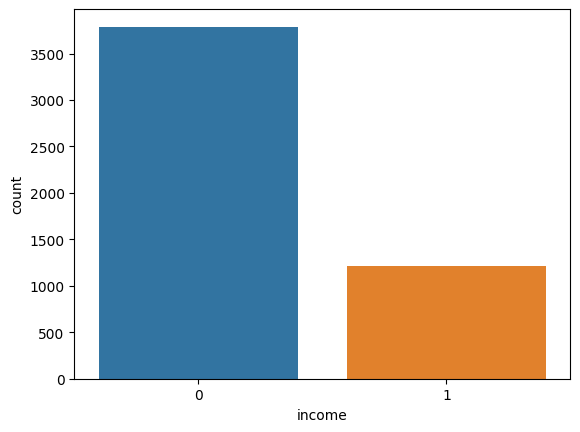

In [8]:
#data["income"] = [cols.replace(' ', '') for cols in data["income"]]
sns.countplot(data=data,x='income')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Private'),
  Text(1, 0, 'State-gov'),
  Text(2, 0, 'Self-emp-not-inc'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'Local-gov'),
  Text(5, 0, 'Self-emp-inc'),
  Text(6, 0, 'Never-worked'),
  Text(7, 0, 'Without-pay')])

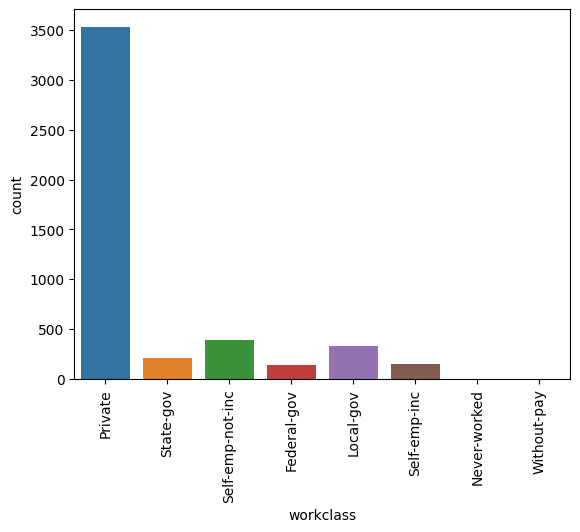

In [9]:
#data["workclass"] = [cols.replace(' ', '') for cols in data["workclass"]]
sns.countplot(data=data,x='workclass')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Doctorate'),
  Text(1, 0, '12th'),
  Text(2, 0, 'Bachelors'),
  Text(3, 0, '7th-8th'),
  Text(4, 0, 'Some-college'),
  Text(5, 0, 'HS-grad'),
  Text(6, 0, '9th'),
  Text(7, 0, '10th'),
  Text(8, 0, '11th'),
  Text(9, 0, 'Masters'),
  Text(10, 0, 'Preschool'),
  Text(11, 0, '5th-6th'),
  Text(12, 0, 'Prof-school'),
  Text(13, 0, 'Assoc-voc'),
  Text(14, 0, '1st-4th'),
  Text(15, 0, 'Assoc-acdm')])

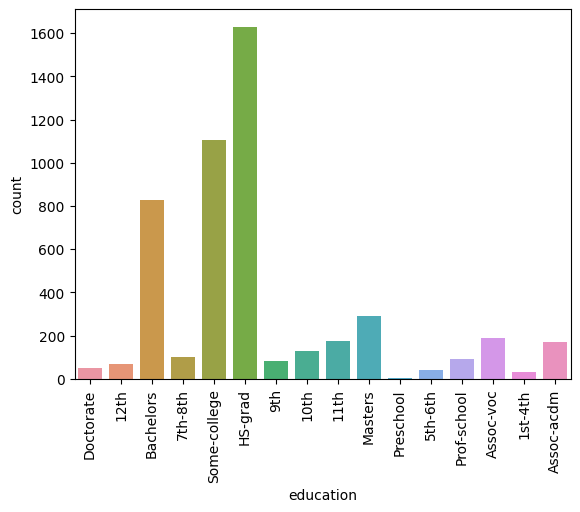

In [10]:
#data["education"] = [cols.replace(' ', '') for cols in data["education"]]
sns.countplot(data=data,x='education')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Divorced'),
  Text(1, 0, 'Never-married'),
  Text(2, 0, 'Married-civ-spouse'),
  Text(3, 0, 'Widowed'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Married-spouse-absent'),
  Text(6, 0, 'Married-AF-spouse')])

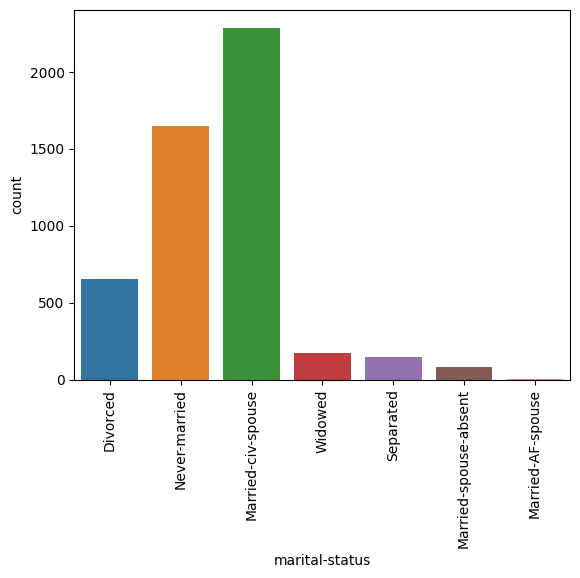

In [11]:
#data["marital-status"] = [cols.replace(' ', '') for cols in data["marital-status"]]
sns.countplot(data=data,x='marital-status')
plt.xticks(rotation=90)

In [ ]:
#data["native-country"] = [cols.replace(' ', '') for cols in data["native-country"]]
sns.countplot(data=data,x='native-country')
plt.xticks(rotation=90)

In [ ]:
#data["occupation"] = [cols.replace(' ', '') for cols in data["occupation"]]
sns.countplot(data=data,x='occupation')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Not-in-family'),
  Text(1, 0, 'Own-child'),
  Text(2, 0, 'Husband'),
  Text(3, 0, 'Wife'),
  Text(4, 0, 'Unmarried'),
  Text(5, 0, 'Other-relative')])

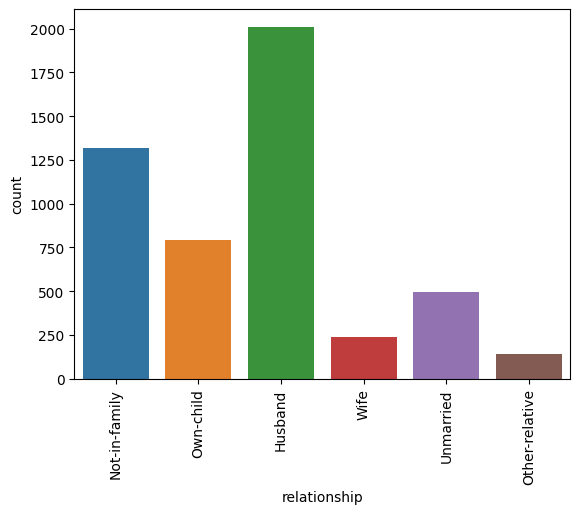

In [12]:
#data["relationship"] = [cols.replace(' ', '') for cols in data["relationship"]]
sns.countplot(data=data,x='relationship')
plt.xticks(rotation=90)

In [ ]:
#data["race"] = [cols.replace(' ', '') for cols in data["race"]]
sns.countplot(data=data,x='race')
plt.xticks(rotation=90)

In [ ]:
data.columns

In [ ]:
#data["sex"] = [cols.replace(' ', '') for cols in data["sex"]]
sns.countplot(data=data,x='gender')
plt.xticks(rotation=90)

### In some columns there are a missing value as "?" but we should convert actual None .

In [ ]:
data = data.replace('?', np.nan)

In [13]:
# Chechking null values 
def about_data(df):
    total_missing_values = df.isnull().sum().reset_index()
    total_missing_values = total_missing_values.rename(columns={'index':'columns',0:'total missing'})
    total_missing_values['ration of missing'] = total_missing_values['total missing']/len(df)
    return total_missing_values


### There are 3 columns have null value. we can drop it because of percentage of missing value very low. 

In [14]:
about_data(data)

,columns,total missing,ration of missing
0,age,0,0.000000
1,workclass,256,0.051210
2,fnlwgt,0,0.000000
3,education,0,0.000000
4,educational-num,0,0.000000
5,marital-status,0,0.000000
6,occupation,258,0.051610
7,relationship,0,0.000000
8,race,0,0.000000
9,gender,0,0.000000


In [15]:
data.dropna(inplace=True,axis=0)

In [16]:
about_data(data)

,columns,total missing,ration of missing
0,age,0,0.0
1,workclass,0,0.0
2,fnlwgt,0,0.0
3,education,0,0.0
4,educational-num,0,0.0
5,marital-status,0,0.0
6,occupation,0,0.0
7,relationship,0,0.0
8,race,0,0.0
9,gender,0,0.0


####  > We are all ready for visualization

# Visualization

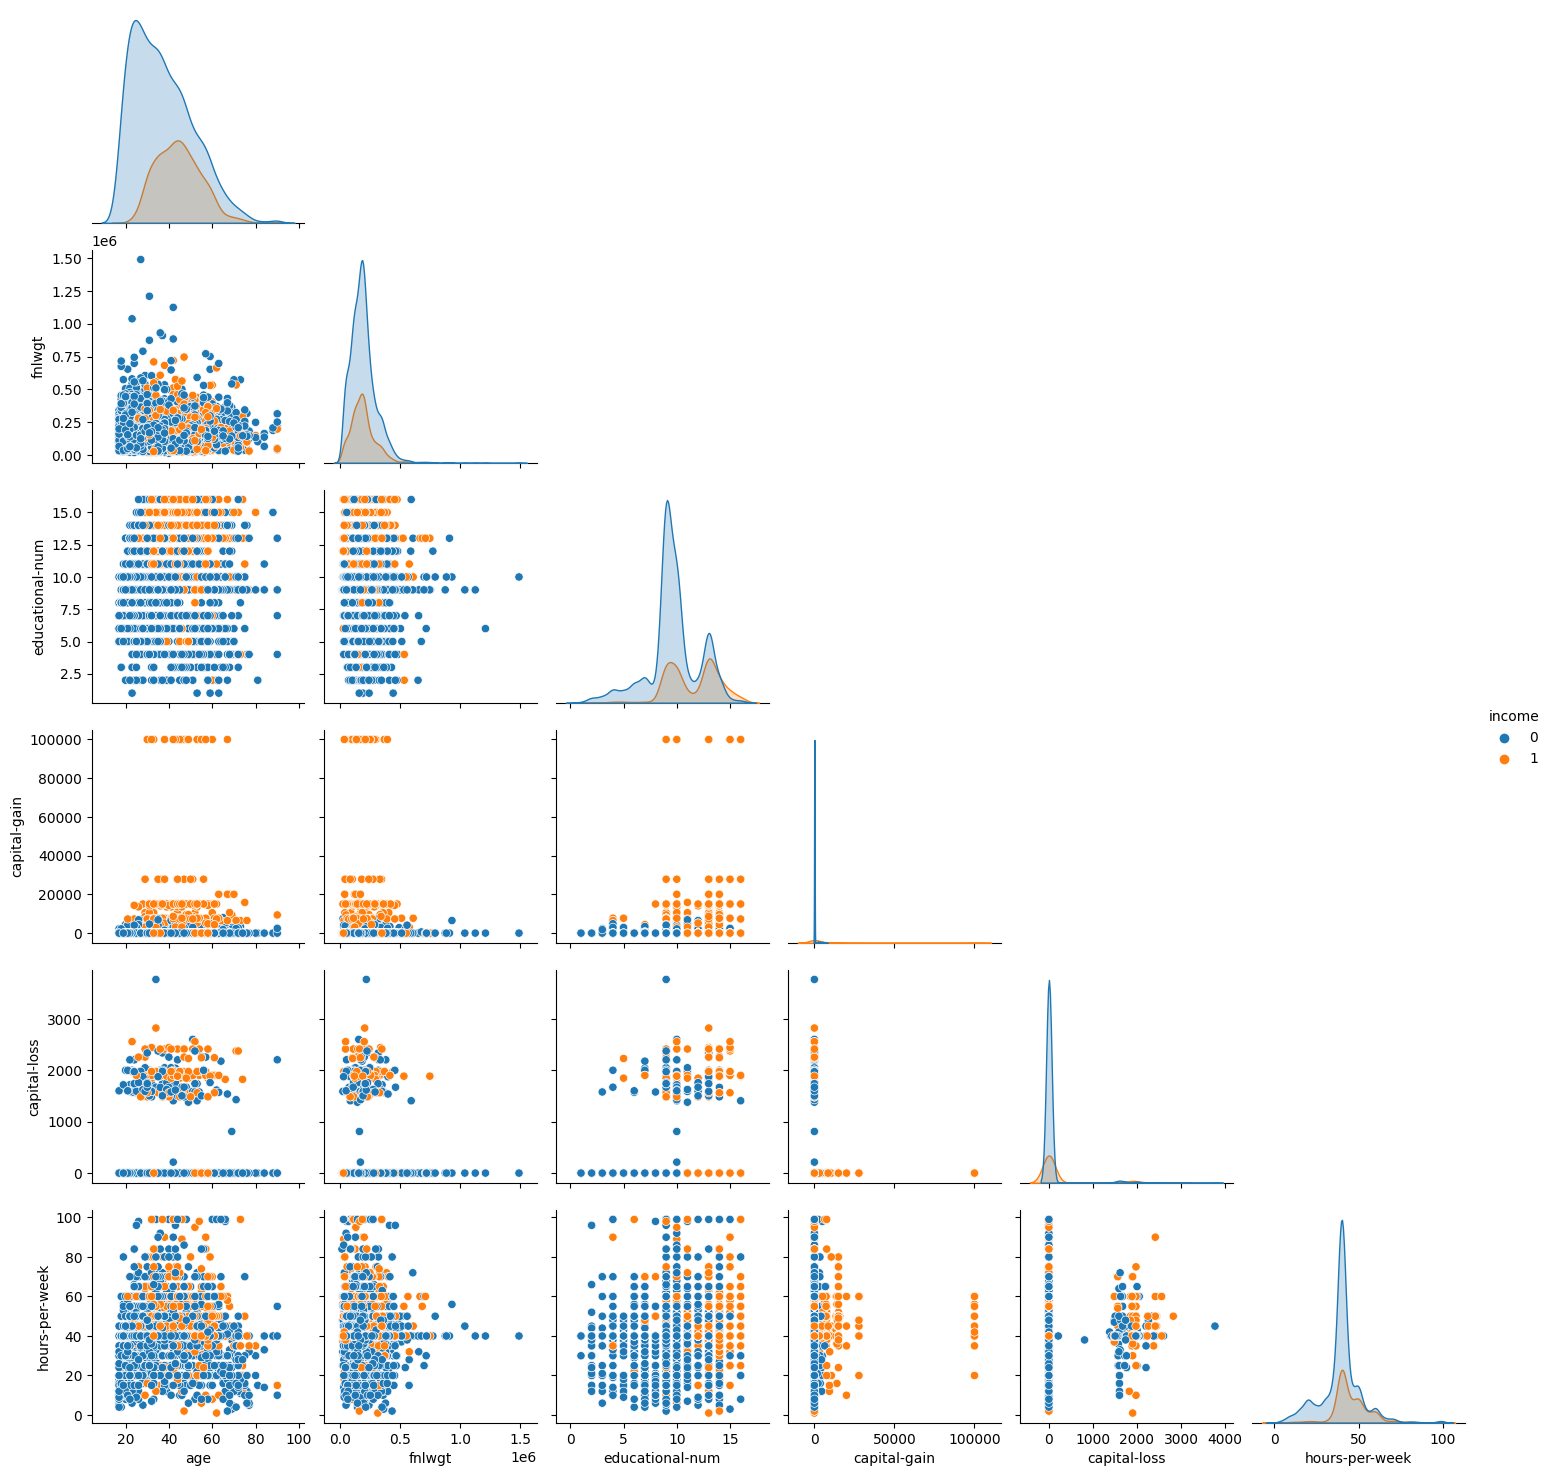

In [17]:
sns.pairplot(data,hue='income',corner=True)

<Axes: xlabel='income', ylabel='educational-num'>

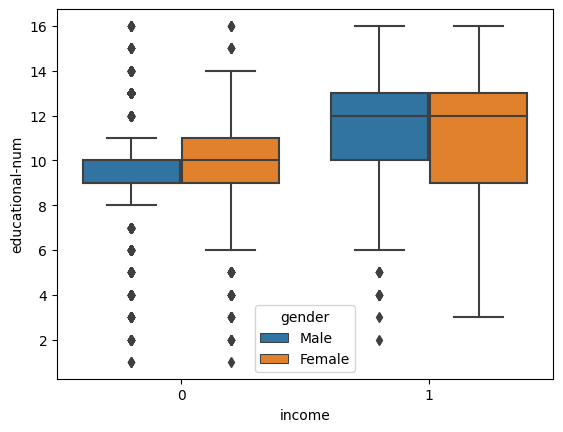

In [18]:
sns.boxplot(x='income',y='educational-num',data=data,hue="gender")

In [19]:
def hist(x,title):
    plt.figure(figsize=(10,8))
    ax = sns.distplot(x, kde=False,bins=30)
    values = np.array([rec.get_height() for rec in ax.patches])
    norm = plt.Normalize(values.min(), values.max())
    colors = plt.cm.jet(norm(values))
    for rec, col in zip(ax.patches,colors):
        rec.set_color(col)
    plt.title(title, size=20, color='black')

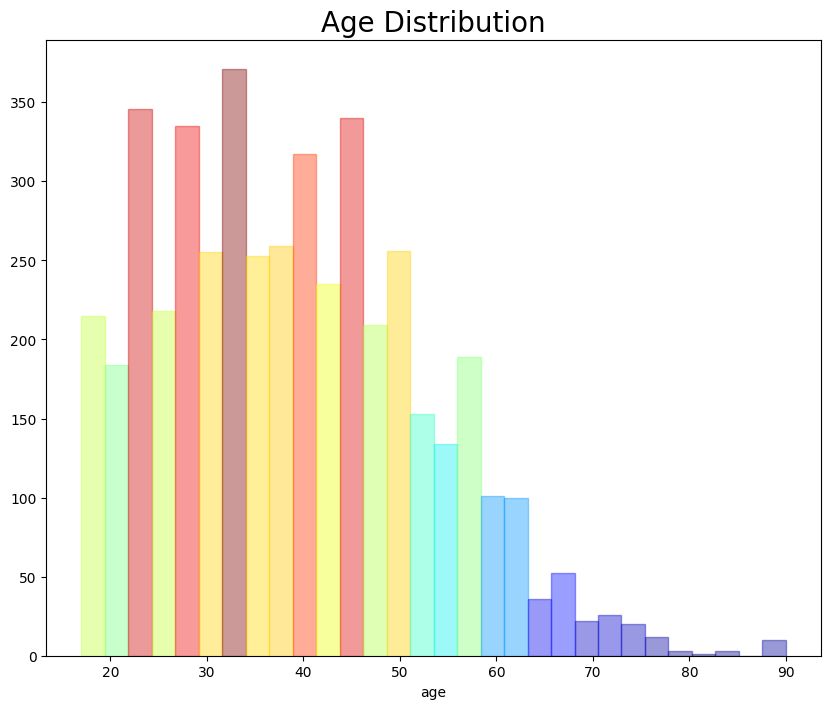

In [20]:
hist(data.age,"Age Distribution")

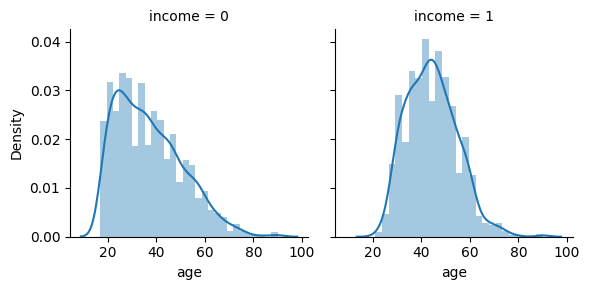

In [21]:
# Explore Age vs Income
grid = sns.FacetGrid(data, col='income')
grid = grid.map(sns.distplot, "age")

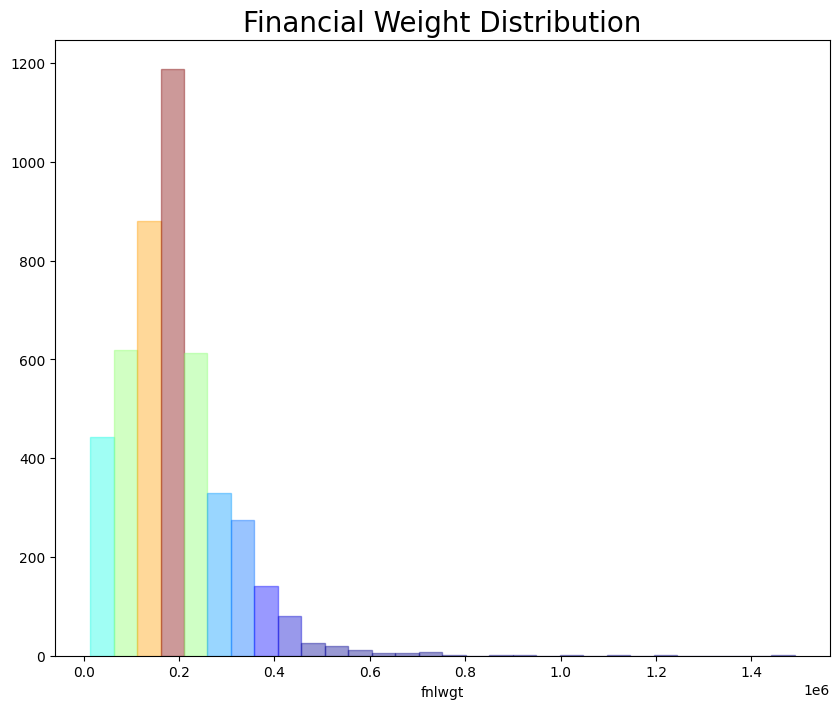

In [22]:
hist(data.fnlwgt,"Financial Weight Distribution")

In [ ]:
hist(data["education-num"]," Education Level Distribution")

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='race',y='education-num',data=data,hue='workclass')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
sns.boxplot(x='workclass',y='education-num',data=data)
plt.xticks(rotation=90)

### We need to change categorical values to numeric values. We have 3 choices. First is Labelencoder and second One hot encoder and last is pandas dummy. Approach will be decided by how many unique values column have.

I will use simple one pandas get dummis and label encoder for "sex" column

In [23]:
cat_columns = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']
df_dumy = pd.get_dummies(data, columns = cat_columns)
df_dumy

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,67,366425,16,99999,0,60,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,17,244602,8,0,0,15,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,31,174201,13,0,0,40,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,58,110199,4,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,25,149248,10,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,21,154235,10,0,0,35,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4995,58,290670,13,0,0,55,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4996,19,278304,10,0,0,15,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4997,36,346478,13,0,2415,45,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False


Now we are ready for split data

In [24]:
X = df_dumy.drop("income",axis=1)
y = df_dumy["income"]

# Imbalace Problem

Data imbalance usually reflects an unequal distribution of classes within a dataset. For example, in a income evaluation dataset, most of the income is higher that 50.000dollars. We have very small data for >50K. This leaves us with something like 50:1 ratio between the  >50K and <50K classes.

<div style="width:100%;text-align: center;"> <img align=middle src="https://miro.medium.com/max/1838/1*P93SeDGPGw0MhwvCcvVcXA.png" alt="Heat beating" style="height:300px;margin-top:3rem;"> </div>

In [25]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [27]:
sum(y_ros)

3483

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=101)

### Scale Data

In [30]:
scaler = StandardScaler()

In [31]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Model

In [33]:
trees = 100
max_features = 3
results = []
names_of_models = []

model_list = [('LR', LogisticRegression()),
             ('KNN', KNeighborsClassifier()),
             ('DTC', DecisionTreeClassifier()),
             ('RFC', RandomForestClassifier(n_estimators=trees,max_features=3))]


for name, model in model_list:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, scaled_X_train, y_train, cv=kfold, scoring='precision')
    results.append(cv_results)
    names_of_models.append(name)
    res = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(res)

LR: 0.8043515792906325 (0.030269847733053787)
KNN: 0.7594470509808391 (0.026647723145177847)
DTC: 0.8586174688542677 (0.016983173242292204)
RFC: 0.8735650606131277 (0.01632432738413458)


> #### *It seems like Random Forest has highest accuracy. So, lets choose random forest model and tune params*

#  Random Forest Model Tune

In [34]:
parameters_for_testing = {
"n_estimators"    : [50,100] ,
 "max_features"        : [2,5],
}
model = RandomForestClassifier()

kfold = KFold(n_splits=5)
grid_cv = GridSearchCV(estimator=model, param_grid=parameters_for_testing, scoring='accuracy', cv=kfold)
result = grid_cv.fit(scaled_X_train, y_train)

print("Best: {} using {}".format(result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{}  {} with: {}" .format(mean, stdev, param))

Best: 0.9056607818411097 using {'max_features': 5, 'n_estimators': 50}
0.8997131147540983  0.007488792078272486 with: {'max_features': 2, 'n_estimators': 50}
0.900534888608659  0.006930297433170209 with: {'max_features': 2, 'n_estimators': 100}
0.9056607818411097  0.008818391811995509 with: {'max_features': 5, 'n_estimators': 50}
0.9038144178226146  0.007323963498567277 with: {'max_features': 5, 'n_estimators': 100}


>  ### ReTrain with new tuned parameters

In [35]:
tuned_model_rf = RandomForestClassifier(n_estimators=50,max_features=5)
tuned_model_rf.fit(scaled_X_train, y_train)
predictions = tuned_model_rf.predict(scaled_X_test)

# Performance

In [36]:
accuracy_score(y_test,predictions)

0.9009569377990431

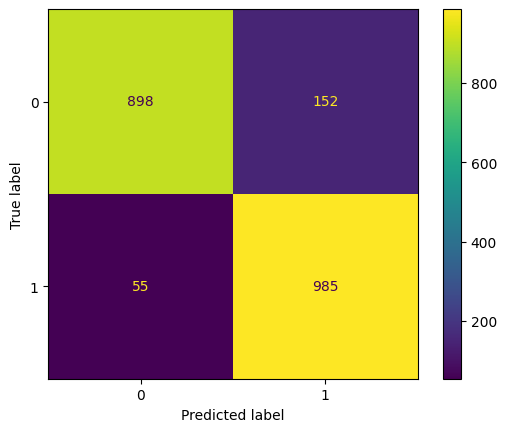

In [37]:
cm = confusion_matrix(y_test, predictions,labels=tuned_model_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=tuned_model_rf.classes_)
disp.plot()

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1050
           1       0.87      0.95      0.90      1040

    accuracy                           0.90      2090
   macro avg       0.90      0.90      0.90      2090
weighted avg       0.90      0.90      0.90      2090



### Feature Importance

#### Top 5 feature 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'native-country_Canada'),
  Text(2, 0, 'native-country_Greece'),
  Text(3, 0, 'native-country_Germany'),
  Text(4, 0, 'native-country_France')])

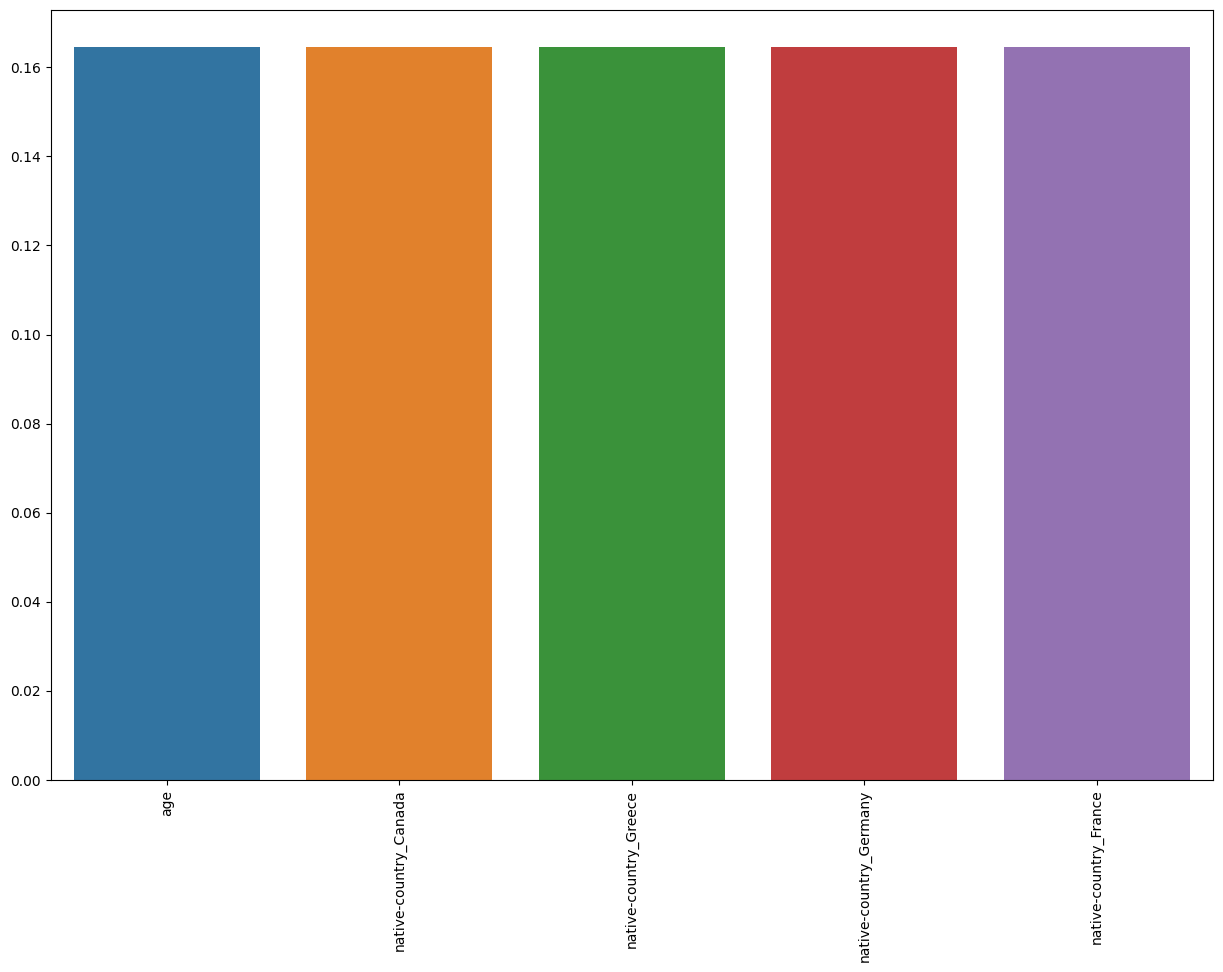

In [39]:
coefs = pd.Series(index=X.columns,data=tuned_model_rf.feature_importances_[0])
coefs = coefs.sort_values(ascending=False)[:5]

plt.figure(figsize=(15,10))
sns.barplot(x=coefs.index,y=coefs.values)
plt.xticks(rotation=90)

### Evaluating Curves and AUC

# I HOPE YOU ENJOY ✌🏻
<div style="width:100%;text-align: center;"> <img align=middle src="https://i2.wp.com/www.thirstydaddy.com/wp-content/uploads/2015/05/thanks-for-reading.png" alt="Heat beating" style="height:300px;margin-top:3rem;"> </div>